# Issue Report Analysis

1. Create a folder in the issue_reports folder to keep it tidy.
2. Upload your file(s) on the left side using the Upload files button (it's stored on an S3 AWS cloud)
2. Replace the file_url link below with the `download link` url using the right mouse button on the filename.
3. Run the entire notebook by using `Run Selected Cell and Below` from the Run menu or push `shift+enter` to execute each cell seperatly.

To edit the code, you can click on the 3 dots to modify the commands.

If you want to create your own analysis, Duplicate the file by using the right mouse button on the file in the menu bar on the left.

In [13]:
# file_url = 'https://omnikit-lab.herokuapp.com/files/issue_reports/Eelke/Loop%20Report%202019-02-10%2022%3A16%3A27%2B01%3A00.md'
# file_url = 'https://omnikit-lab.herokuapp.com/files/issue_reports/Eelke/Loop%20Report%202019-02-10%2022%3A16%3A27%2B01%3A00.md'
file_url = 'https://omnikit-lab.herokuapp.com/files/issue_reports/Phillip/Loop-Report-2019-02-13-2244340100.md'

In [14]:
# !pip install matplotlib

### Load all packages

In [15]:
%matplotlib inline
import requests
import time
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.dates import DateFormatter
import re
import pandas as pd

### Load and parse file

In [44]:
file = requests.get(file_url)
xcode_log_text = file.text
# with open('/Users/eelkejager/Downloads/LoopReport201902130358020100.md', 'r') as output:
# with open('/Users/eelkejager/Downloads/Loop-Report-2019-02-04-17_21_52-07_00.md', 'r') as output:
with open('/Users/eelkejager/Downloads/Loop-Report-2019-02-12-072943-0800.md', 'r') as output:
    xcode_log_text = output.read()

commands = []
regex = r"\* ([0-9-:\s]*)\s.*\s(send|receive)\s([a-z0-9]*)\n*"
select_1a_commands = re.findall(regex, xcode_log_text, re.MULTILINE)
for line in select_1a_commands:
    commands.append({"time": line[0], "type": line[1], "raw_value": line[2][12:]})

In [45]:
# Uncomment line below if you want to see the output of the parsed file to a dictonary:
print(commands)

[{'raw_value': '07041f0c27a40017', 'type': 'send', 'time': '2019-02-09 10:25:28'}, {'raw_value': '011502080002080002020000abee00069206b01f0c27a40132', 'type': 'receive', 'time': '2019-02-09 10:25:30'}, {'raw_value': '03131f0c27a4140402091302190000abee00069206836c', 'type': 'send', 'time': '2019-02-09 10:25:31'}, {'raw_value': '011b13881008340a5002080002080002030000abee000692061f0c27a401b1', 'type': 'receive', 'time': '2019-02-09 10:25:33'}, {'raw_value': '080684f797e3000082f4', 'type': 'send', 'time': '2019-02-09 10:25:34'}, {'raw_value': '1d0300000000000003ff003e', 'type': 'receive', 'time': '2019-02-09 10:25:36'}, {'raw_value': '190af138b40f4c0000c801020185', 'type': 'send', 'time': '2019-02-09 10:25:37'}, {'raw_value': '1d0300001000000003ff8314', 'type': 'receive', 'time': '2019-02-09 10:25:38'}, {'raw_value': '190a64b5d1327837000508028290', 'type': 'send', 'time': '2019-02-09 10:25:40'}, {'raw_value': '1d0300002000000003ff8285', 'type': 'receive', 'time': '2019-02-09 10:25:40'}, {'

In [46]:
def select_extra_command(raw_value):
    if raw_value[:2]=='1a':
        if raw_value[32:34] not in ['16','17']:
            return 13
        else:
            return raw_value[32:34]
    else:
        return ''

In [47]:
def generate_table(commands):
    df = pd.DataFrame(commands)
    df['time'] = pd.to_datetime(df['time'])
    df['command'] = df['raw_value'].str[:2].astype(str)+df['raw_value'].apply(select_extra_command).fillna('').astype(str)
    df['time_delta'] = (df['time']-df['time'].shift()).dt.seconds.fillna(0).astype(int)
    return df
df = generate_table(commands)
df

,raw_value,time,type,command,time_delta
0,07041f0c27a40017,2019-02-09 10:25:28,send,07,0
1,011502080002080002020000abee00069206b01f0c27a4...,2019-02-09 10:25:30,receive,01,2
2,03131f0c27a4140402091302190000abee00069206836c,2019-02-09 10:25:31,send,03,1
3,011b13881008340a5002080002080002030000abee0006...,2019-02-09 10:25:33,receive,01,2
4,080684f797e3000082f4,2019-02-09 10:25:34,send,08,1
5,1d0300000000000003ff003e,2019-02-09 10:25:36,receive,1d,2
6,190af138b40f4c0000c801020185,2019-02-09 10:25:37,send,19,1
7,1d0300001000000003ff8314,2019-02-09 10:25:38,receive,1d,1
8,190a64b5d1327837000508028290,2019-02-09 10:25:40,send,19,2
9,1d0300002000000003ff8285,2019-02-09 10:25:40,receive,1d,0


# Total time

In [48]:
first_command = df.iloc[0]['time']
last_command = df.iloc[-1]['time']
last_command - first_command

Timedelta('3 days 05:03:11')

# Total send/received commands

In [49]:
df.groupby(['type']).size()

type
receive    1996
send       2002
dtype: int64

# Total commands by type

In [50]:
df.groupby(['type','command']).size()

type     command
receive  01            2
         06            4
         1d         1990
send     03            1
         07            1
         08            1
         0e          342
         11            2
         19            4
         1a13          2
         1a16        794
         1a17         50
         1f          805
dtype: int64

## Average times

In [51]:
mean_seconds_time_delta = (df['time_delta']).mean()
print('Average time between commands =',time.strftime("%H:%M:%S",time.gmtime(mean_seconds_time_delta.astype(int))))
print('Average time between commands =',round(mean_seconds_time_delta/60,3), 'minutes')
mean_receive_time_delta = (df.loc[df['type'] == 'receive']['time_delta']).mean()
print('Average receive time after send command =',round(mean_receive_time_delta,3), 'seconds')

('Average time between commands =', '00:01:09')
('Average time between commands =', 1.156, 'minutes')
('Average receive time after send command =', 2.195, 'seconds')


# Time graph

KeyError: 'extra_command'

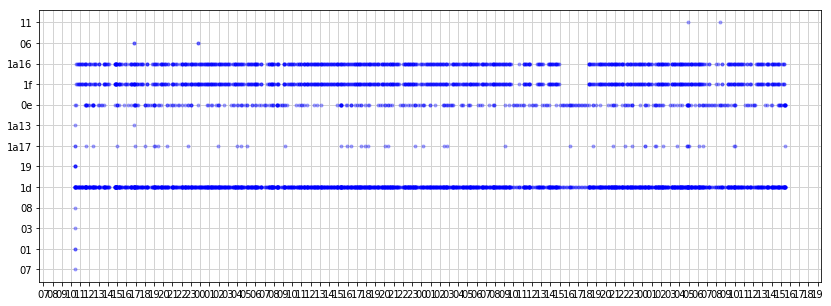

In [52]:
fig, ax = plt.subplots(figsize=(14,5))
ax.grid(color='lightgray', linestyle='-', linewidth=1)
set_time_format = DateFormatter('%H')
ax.xaxis.set_major_locator(dates.HourLocator())
ax.xaxis.set_major_formatter(set_time_format)

ax.plot(df['time'],df['command'], marker='o', linestyle='None', alpha=0.3,c='b', markersize=3)
ax.plot(df['time'],df['extra_command'], marker='x', linestyle='None',c='g', markersize=3)
# Set x-axis range
xmin = df.iloc[0]['time']
xmax = df.iloc[-1]['time']
ax.set_xlim(xmin, xmax)

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
plt.show()

# All commands

In [ ]:
df = generate_table(commands)
pd.set_option('display.max_rows', None)
df.tail(20)
# comment the df below with an # to show only last 20 values
df

--------

In [53]:
df.loc[df['type'] == 'receive'].tail(20)

,raw_value,time,type,command,time_delta
3959,1d290706b0004047e81f8196,2019-02-12 15:03:48,receive,1d,1
3961,1d290706b0004047e81f0318,2019-02-12 15:03:55,receive,1d,2
3963,1d19070870004047fc1c83c4,2019-02-12 15:08:57,receive,1d,2
3965,1d29070800004047fc1c812b,2019-02-12 15:09:03,receive,1d,2
3967,1d1907099000404810190326,2019-02-12 15:13:56,receive,1d,2
3969,1d290709a000404810190217,2019-02-12 15:14:02,receive,1d,3
3971,1d19070b30004048241602d0,2019-02-12 15:18:58,receive,1d,4
3973,1d29070b400040482416003f,2019-02-12 15:19:04,receive,1d,3
3975,1d29070bc0004048301581d2,2019-02-12 15:21:38,receive,1d,1
3977,1d29070bc00040483015035c,2019-02-12 15:21:50,receive,1d,1


In [54]:
# Resync nonce
df.loc[df['command'].isin(['06','02'])]

,raw_value,time,type,command,time_delta
342,0603141809038e,2019-02-09 16:48:39,receive,06,0
344,0603141903032c,2019-02-09 16:48:42,receive,06,2
721,060314d8e2831e,2019-02-09 23:49:21,receive,06,2
723,060314482280dd,2019-02-09 23:49:26,receive,06,3
